# Assignment 4 by Zain Nasrullah

# Definition of Function

The function below takes an input population as a series, a list of samples taken and a list of sample sizes in order to produce a histogram of the sample mean distribution. In the process of doing so, it also summarizes all calculated values in a Data Frame that calculate data that will be used for analysis. 

In [8]:
# Import Statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def sampleDistribution(population, samples_taken,samples_size):
    
    # Set Up
    sample_parameters = []
    parameter_mean = []
    parameter_mean_list = []
    
    # Iterate through array, sample as per input arguments and append to a list
    for no_samples in samples_taken:
        for size in samples_size:
            for i in range (no_samples):
                data = population.sample(n=size)
                # Note: data.std() below takes the sample standard deviation with n-1
                sample_parameters.append([no_samples,size,i+1,data.mean(), data.std()])
                parameter_mean.append(data.mean())
            parameter_mean_list.append(parameter_mean)
            parameter_mean=[]
    
    # Convert the list into a DataFrame
    df = pd.DataFrame(sample_parameters, columns = ['Group (Samples Taken)','Sample Size','Sample Iteration', 'Mean','Std'])

    # Plot the distribution of sample means
    f, axarr = plt.subplots(len(samples_taken), len(samples_size), figsize=(15,8))
    k = 0
    
    for i in range(len(samples_taken)):
        for j in range(len(samples_size)):
            # Including a try and except statement here for when the input array sizes are 1, different syntax required
            try: 
                axarr[i, j].hist(parameter_mean_list[k])
                axarr[i, j].set_title(str(samples_taken[i])+" samples, size=" +str(samples_size[j]))
            except:
                if (len(samples_taken) == 1):
                    l = j;
                elif (len(samples_size) == 1):
                    l = i;
                axarr[l].hist(parameter_mean_list[k])
                axarr[l].set_title(str(samples_taken[i])+" samples, size=" +str(samples_size[j]))
            k += 1
    
    return df

# Simulation 1: Confidence Interval

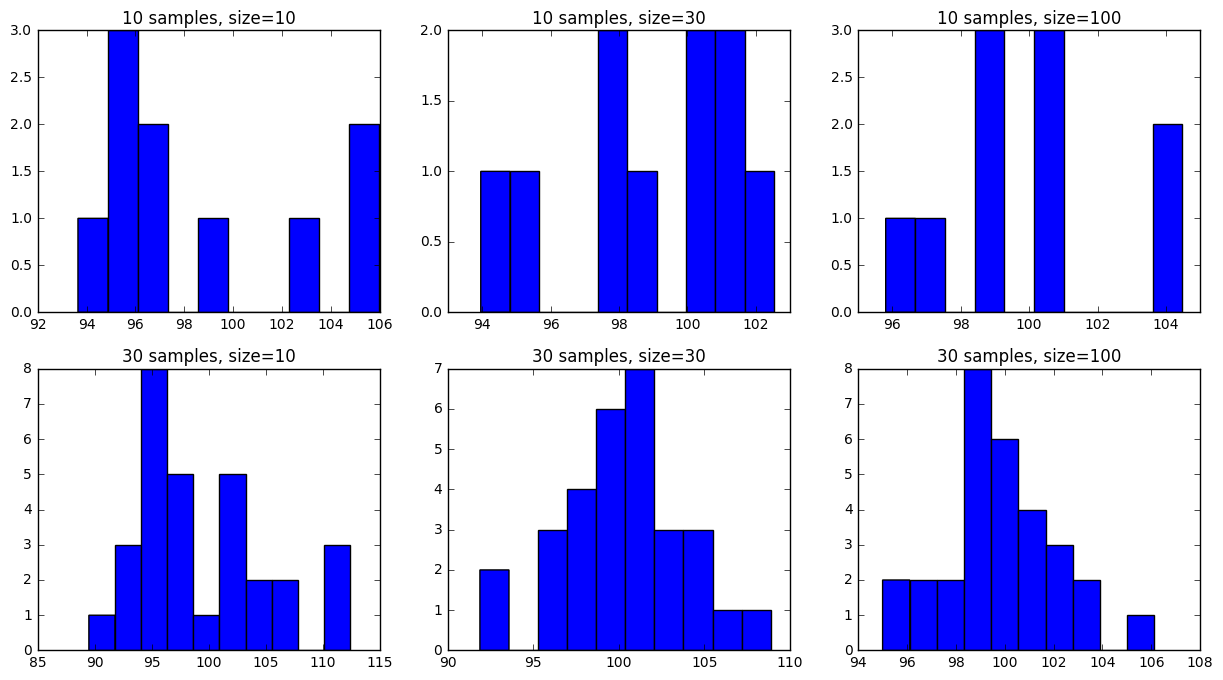

In [9]:
# Define the population
pop_size = 1000
sigma = 20
mu = 100
population = pd.Series(sigma *  np.random.randn(pop_size) + mu)

# Define the sampling methodology
samples_taken = [10,30]
samples_size = [10,30,100]

# Call the plotting function and print the head of the data
df = sampleDistribution(population, samples_taken,samples_size);
plt.show()

# Summary Statistics: Confidence Interval

How the data looks and a short summary of the distribution

In [37]:
# What the data looks like
df.head()

,Group (Samples Taken),Sample Size,Sample Iteration,Mean,Std
0,10,10,1,90.533590,22.796850
1,10,10,2,83.938064,11.930100
2,10,10,3,102.819816,25.571681
3,10,10,4,100.760708,16.768264
4,10,10,5,99.654056,24.223652


In [33]:
# Mean summary (the mean of means) for the sampled data
df.groupby(['Group (Samples Taken)', 'Sample Size']).mean()

Sample Iteration        Mean        Std
Group (Samples Taken) Sample Size                                         
10                    10                        5.5   95.887208  21.525871
                      30                        5.5  100.061957  20.973881
                      100                       5.5  100.099183  19.442883
30                    10                       15.5   99.787887  19.437516
                      30                       15.5   98.792860  20.065362
                      100                      15.5   99.682400  20.311416

In [38]:
# Looking at confidence intervals and whether they contain the true mean
# Using the st.t.interval instead of st.norm.interval as it is better for small sample sizes where the population is approx. normal

import scipy.stats as st

df["Standard Error"] = df.apply(lambda x: x["Std"] / np.sqrt(x["Sample Size"]), axis = 1)
df["Confidence Interval"] = df.apply(lambda x: st.t.interval(0.95, x["Sample Size"], loc=x["Mean"], scale=x["Standard Error"]), axis = 1)
df["Contains μ"] = df.apply(lambda x: x["Confidence Interval"][0] <= mu and x["Confidence Interval"][1] >= mu, axis = 1)
df

,Group (Samples Taken),Sample Size,Sample Iteration,Mean,Std,Standard Error,Confidence Interval,Contains μ
0,10,10,1,90.533590,22.796850,7.208997,"(74.4709441332, 106.596236206)",True
1,10,10,2,83.938064,11.930100,3.772629,"(75.5321231065, 92.3440053948)",False
2,10,10,3,102.819816,25.571681,8.086476,"(84.8020252272, 120.837605923)",True
3,10,10,4,100.760708,16.768264,5.302591,"(88.9457996273, 112.575616681)",True
4,10,10,5,99.654056,24.223652,7.660191,"(82.5860863016, 116.722025997)",True
5,10,10,6,101.337137,23.590413,7.459944,"(84.7153470066, 117.958927665)",True
6,10,10,7,93.844228,21.820175,6.900145,"(78.4697466772, 109.218709262)",True
7,10,10,8,106.038036,24.092211,7.618626,"(89.0626792185, 123.013393084)",True
8,10,10,9,112.247463,23.990479,7.586456,"(95.3437865698, 129.151140067)",True
9,10,10,10,99.727996,15.746012,4.979326,"(88.6333651024, 110.822625958)",True


In [39]:
# Summary of Confidence Interval results
print("Percentage of sample confidence intervals containing the actual population mean:")
round(100 * df[["Contains μ","Confidence Interval"]].groupby("Contains μ").count() / len(df),2)

Percentage of sample confidence intervals containing the actual population mean:


,Confidence Interval
Contains μ,
False,5.83
True,94.17


# Discussion of Results: Confidence Interval

Q1.1)
Sampling error can be thought of as a poor representation of the actual population and any inferences drawn from this sample should be considered unreliable. While this may seem fairly obvious, oversight, bias or otherwise poorly designed experiments often result in inaccurate findings which leads to poor decision-making. 

Sampling error can come in many forms. For example, one may sample from the wrong population for the question being asked: consider a marketing company only using feedback from individuals 40 years and older for a teenage clothing line. It seems counter-intuitive, no? One may also sample from the correct population but  too few times to get an understanding: consider that same marketing company only reviewing a handful of results for a global product launch. They may falsely jump to the conclusion that their product is universally loved-- only to launch it to poor sales. 

As a result, in order to properly understand our data and make intelligent decisions, it is important to ensure that our data is collected and interpreted correctly. Although it seems to be 'obvious' or 'easy' to do so, this is one of the greatest struggles in real-world statistics. Consider all the Blockbuster films or product releases that end up becoming commercial failures despite a massive development and advertisting investment; perhaps, their test audiences were misrepresentative of the actual population. 

Q1.2) 
As discussed briefly above, sampling error can be a major issue. To help mitigate it, one must ensure that he or she takes a sufficiently large sample. The confidence level describes the proportion of the confidence intervals that contain the true population parameters. Assuming a fixed confidence level, by increasing the sample size we are minimizing the effect of potential bad samples and thus reducing the overall standard error. This will result in a narrower confidence interval as we are more confident about our sample. This relationship is particularly important because if we want to increase our overall confidence level, the width of the confidence interval would increase too and thus increasing the sample size is a good method of compensation. Increasing the number of samples taken helps develop the mean sampling distribution by including more data points. If too few samples (of any size) are taken, we will not have enough data to generate a meaningful histogram. As one can observe, with only 10 samples taken, each histogram seems to be lacking shape while the histograms generated via 30 samples are much more developed. Since more data helps in reducing standard error, this would also make the confidence interval more narrow. 

Q1.3) 
As discussed above, the confidence interval depends on the selected confidence level and even then there is only a chance that the true population mean will exist within that interval for all intervals. For example, a singular interval only has a 0% or 100% chance to include the population parameter; but with a 95% confidence level, 95% of all intervals will contain the true population parameters. Furthermore, as also mentioned above, higher confidence levels require wider confidence intervals. In the simulation, we can observe that approximately 95% of intervals do in fact contain the actual population mean. 


# Simulation 2: Central Limit Theorem

## Normal Simulation

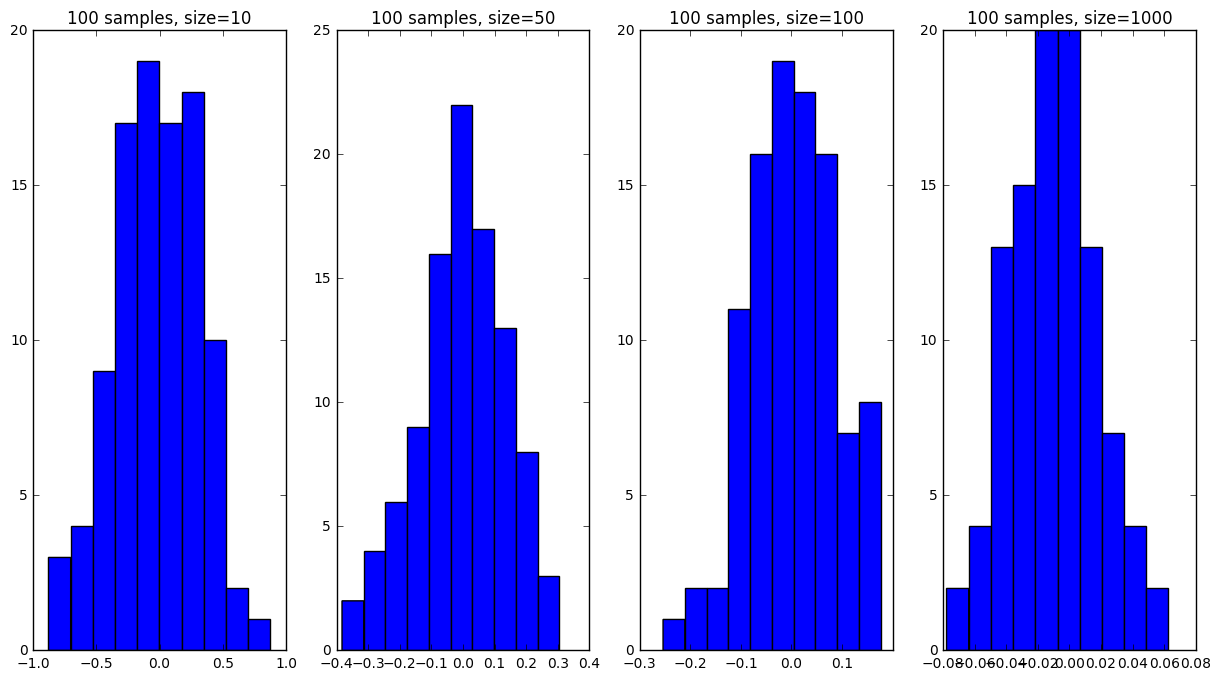

In [9]:
# Define the population
pop_size = 10000
sigma = 1
mu = 0
population = pd.Series(sigma *  np.random.randn(pop_size) + mu)

# Define the sampling methodology
samples_taken = [100]
samples_size = [10,50,100,1000]

# Call the plotting function and print the head of the data
df = sampleDistribution(population, samples_taken,samples_size);
plt.show()

## Lognormal Simulation

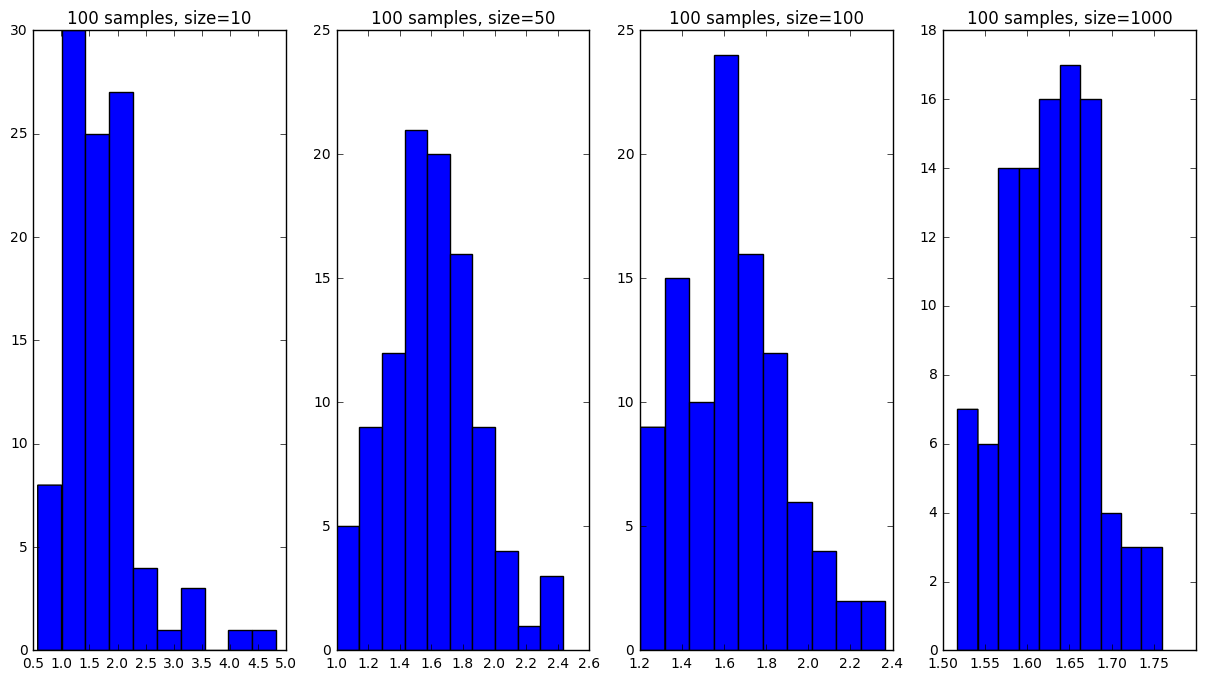

In [10]:
# Define the population
pop_size = 10000
sigma = 1
mu = 0
population = pd.Series(np.random.lognormal(mu, sigma, pop_size))

# Define the sampling methodology
samples_taken = [100]
samples_size = [10,50,100,1000]

# Call the plotting function and print the head of the data
df = sampleDistribution(population, samples_taken,samples_size);
plt.show()

## Uniform Simulation

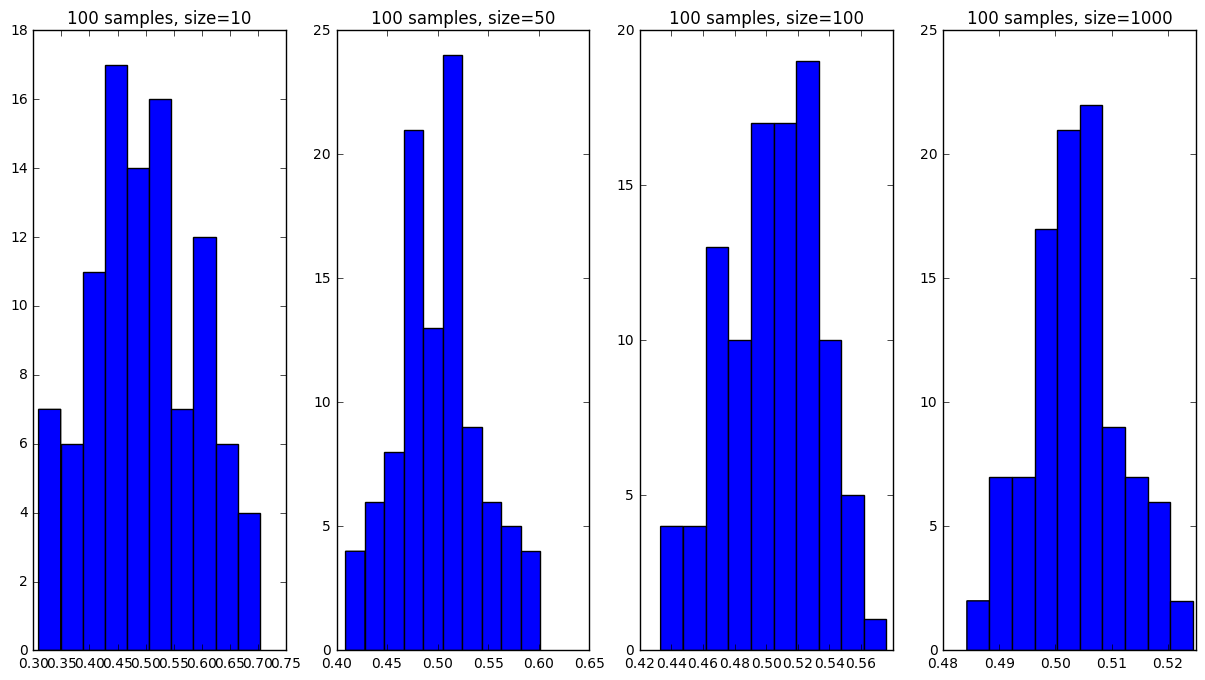

In [13]:
# Define the population
pop_size = 10000
sigma = 1
mu = 0
population = pd.Series(np.random.uniform(mu, sigma, pop_size))

# Define the sampling methodology
samples_taken = [100]
samples_size = [10,50,100,1000]

# Call the plotting function and print the head of the data
df = sampleDistribution(population, samples_taken,samples_size);
plt.show()

# Discussion of Results: Central Limit Theorem

As per theory, as the number of samples increases, the results of all three sampling simulations approached or could be approximated by a normal distribution. To make these effects more noticable, I increased the number of samples taken from the suggested values. Distinctly, the majority of observations are centered around the mean and decrease with each standard deviation. Although this is a key theorem in Statistics, there isn't much to discuss as the results agree with theory for sufficiently large sample sizes. Observing this theorem is possible via this simulation, but a thorough proof can be obtained through Calculus. 

As one would expect, the log-normal distribution initially looks like a skewed normal distribution. As the number of samples increases, the effect of the skew diminishes and the distribution tends towards a symmetrical curve. From the uniform distribution, it initially seems that the results may be equally probable but there are hints of it seemingly normally distributed as we move towards the outliers. As the number of samples increases, the histogram become progressively more normal.

As mentioned in class, the uniform distribution tends to the normal very quickly as the number of samples increases whereas the log-normal demonstrates a more gradual change. This is likely due to each of their initial distribution shapes. 